<a href="https://colab.research.google.com/github/Kaivan-Khazeni/Whoop_Data_EDA/blob/main/mod5_kaivan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import numpy as np
import statsmodels.formula.api as smf
import seaborn as sb


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Module 5
* Name : Kaivan Khazeni
* uID : u1135484
* Date : April 17th

Goal of Module
* "Identify an example of a news story, op-ed, academic article, etc. making strong causal claims and do an EDA to explore alternative causal mechanisms"

#SUMMARY AND IDENTITY
[Article found Regarding HRV and Sleep](https://academic.oup.com/sleep/article/36/12/1939/2709419)
* The article found above tackles the metric **Heart Rate Variability** which is the bodies measurable response in terms of sympathetic and parasympathetic nervous systems.  These systems are linked to a bodies stress in physical and mental/emotional sense, along with the bodies ability to be in a relaxed state.
* HRV can increase and decrease over time, and HRV is different for everyone.  This means that HRV will change but the value is arbitrary.  A personal value of mine varies between 70-95 on any given day, where as Age, Sex, and other metrics can change those values dramatically (as a baseline).

* Claim of Article: "Consequently, sleep quality is an important predictor for the
autonomic development even more important than sleep duration."
* This claim is stating that while sleep duration is important, sleep quality is more indicative of an increase in HRV.
* The authors of this article ran an experiment, therefore, Hill's casual claims in the article from class states that this claim was based off of experimentation.  This experiment has led to a strength claim of correlation.  The experiment was consisted of data that had N = 135 nights of sleep.
* For experiments, the authors cross selected Sleep Quality and Sleep Duration as the model with the dependent variable consisting of HRV (which we will also run on my personal data from Whoop).
* These experiments found paired t-test values to show significance.  
* "Nevertheless, reported sleep duration was not associated with
HRV outcome. Longitudinal results showed the same trend,
particularly with a higher sympathovagal balance for those with
low sleep quality. Consequently, low sleep quality is related to
a more unhealthy change in autonomic balance over one year"

* The primary causal relationship was simple causal, where X causes Y, and Sleep Quality or increase in Sleep Quality causes increase in HRV

Alternative Casual Relationship (via Hill's framework)
* The above article used experimentation and strength of correlation/significance to make their claim.  In this case, it is X causes Y with a simple causation, that sleep quality ( or high level quality ) causes increase in HRV
* An alternative would be X causes A and A causes Y with another metric, sleep consistency (Mediation is the mechanism).
* This could also apply to Confounding causation, where A causes X and Y, meaning some metric causes better sleep quality AND increase in HRV.
* The reason this could be beneficial is Sleep Quality might have a strong relationship with HRV on its own or compared to sleep duration individually, but could rank differently if another metric can be used
* With Whoop Data, I will compare Sleep Consistency, Sleep Quality, Sleep Duration as the variables with HRV as the dependent variable


# EDA 
* The assignment specifications state that the EDA must perform the analysis on the original data from the article and the new data to support the alternative relationship/mechanism.  However, the original data in many articles found are not provided, rather just the N amounts of data along with specific experimented tests with their corresponding results.
* The data presented in this section will be their (authors of the article) statistical tests along with my alternative.
* Since the data is not provided, I will use my Whoop data with similar metrics and compare the results in terms of significance as a side test, not my primary causal relationship.


1. Read in my alternative causation data

In [ ]:
ss_link = "https://docs.google.com/spreadsheets/d/101VFdWUNabrT6nu9_EokXFK-Pq4pQLxUbUiooeK5H8M/edit#gid=1713221660"
new_link = "https://docs.google.com/spreadsheets/d/101VFdWUNabrT6nu9_EokXFK-Pq4pQLxUbUiooeK5H8M/export?format=csv&gid=1713221660"


In [ ]:
df = pd.read_csv(new_link)
df.head(5)

,User ID,cycle_id,Date,Day of Week,RHR,HRV,Recovery,Sleep Score,Sleep Onset,Wake Onset,...,Nap Light,Nap Wake,Nap Missing Data,Total Cycle Sleep Time (hours),REM Onset Latency (minutes),timezone_offset,REM Percentage,Deep Sleep Percentage,Restorative Sleep (hours),Restorative Sleep (%)
0,129811,12626595,2019-10-03,thursday,46,82,55,77,21:56:17,5:16:42,...,NaN,NaN,NaN,6.65,68.4,-1 days +18:00:00,26.7,26.4,3.90,53.1
1,129811,12678739,2019-10-04,friday,50,80,54,80,23:03:11,6:59:38,...,NaN,NaN,NaN,7.35,36.2,-1 days +18:00:00,22.7,23.2,3.64,45.8
2,129811,12716913,2019-10-05,saturday,46,95,61,66,23:37:27,6:33:02,...,NaN,NaN,NaN,6.15,85.1,-1 days +18:00:00,29.4,23.8,3.69,53.2
3,129811,12764862,2019-10-06,sunday,50,106,68,73,0:04:10,7:29:49,...,NaN,NaN,NaN,6.94,68.7,-1 days +18:00:00,24.6,26.5,3.80,51.1
4,129811,12815943,2019-10-07,monday,51,78,52,77,23:23:14,7:53:48,...,NaN,NaN,NaN,7.43,53.2,-1 days +18:00:00,27.4,26.6,4.59,53.9


In [ ]:
df.columns

Index(['User ID', 'cycle_id', 'Date', 'Day of Week', 'RHR', 'HRV', 'Recovery',
       'Sleep Score', 'Sleep Onset', 'Wake Onset', 'Hours in Bed',
       'Hours of Sleep', 'Sleep Need', 'Sleep Efficiency (%)', 'Wake Periods',
       'Sleep Disturbances', 'Latency (min)', 'Cycles', 'REM Sleep (hours)',
       'Deep Sleep (hours)', 'Light Sleep (hours)', 'Awake (hours)',
       'Missing Data (hours)', 'Sleep Debt (hours)', 'Sleep Consistency',
       'Respiratory Rate', 'Last Nap End Time', 'Nap Time in Bed',
       'Total Cycle Nap Time (hours)', 'Nap Disturbances', 'Nap REM',
       'Nap SWS', 'Nap Light', 'Nap Wake', 'Nap Missing Data',
       'Total Cycle Sleep Time (hours)', 'REM Onset Latency (minutes)',
       'timezone_offset', 'REM Percentage', 'Deep Sleep Percentage',
       'Restorative Sleep (hours)', 'Restorative Sleep (%)'],
      dtype='object')

2. Check the packaging
* 481 days of data with 42 variables

In [ ]:
df.shape

(481, 42)

In [ ]:
#New data set with variables from Article with another metric of interest (Sleep Consistency)

In [ ]:
var_df = df[['HRV','Sleep Efficiency (%)','Latency (min)','Hours of Sleep','Sleep Consistency']]
var_df.head(5)


,HRV,Sleep Efficiency (%),Latency (min),Hours of Sleep,Sleep Consistency
0,82,91,0.95,6.65,NaN
1,80,92,0.00,7.35,NaN
2,95,89,2.92,6.15,NaN
3,106,93,2.40,6.94,76.0
4,78,87,2.90,7.43,84.0


3. Check the the head and tail of the data

In [ ]:
print("Head of Data")
print(var_df.head(5))
print("Tail of Data")
print(var_df.tail(5))

Head of Data
   HRV  Sleep Efficiency (%)  Latency (min)  Hours of Sleep  Sleep Consistency
0   82                    91           0.95            6.65                NaN
1   80                    92           0.00            7.35                NaN
2   95                    89           2.92            6.15                NaN
3  106                    93           2.40            6.94               76.0
4   78                    87           2.90            7.43               84.0
Tail of Data
     HRV  Sleep Efficiency (%)  ...  Hours of Sleep  Sleep Consistency
476   60                    87  ...            7.09               72.0
477   61                    91  ...            5.66               73.0
478   73                    88  ...            6.44               70.0
479   67                    84  ...            6.28               59.0
480   55                    84  ...            5.61               68.0

[5 rows x 5 columns]


4. Check the n's of the data
* Rows should be equal to the orignal data set, with only 5 columns

In [ ]:
print(df.shape[0] == var_df.shape[0])
print("Number of columns")
print(var_df.shape[1])

True
Number of columns
5


5. Validate data/clean data

In [ ]:
#Check for missing data
print(var_df.isnull().sum())
var_df = var_df.dropna()
#should see the rows be 6 less, therefore 475
print(var_df)


HRV                     0
Sleep Efficiency (%)    0
Latency (min)           0
Hours of Sleep          0
Sleep Consistency       6
dtype: int64
     HRV  Sleep Efficiency (%)  ...  Hours of Sleep  Sleep Consistency
3    106                    93  ...            6.94               76.0
4     78                    87  ...            7.43               84.0
5    110                    81  ...            7.11               86.0
6     72                    75  ...            6.81               87.0
7    104                    87  ...            6.82               84.0
..   ...                   ...  ...             ...                ...
476   60                    87  ...            7.09               72.0
477   61                    91  ...            5.66               73.0
478   73                    88  ...            6.44               70.0
479   67                    84  ...            6.28               59.0
480   55                    84  ...            5.61               68.0

[475

Below will be a snippet of the articles findings when it is regarding their linear regression modeling of HRV predictor indicators

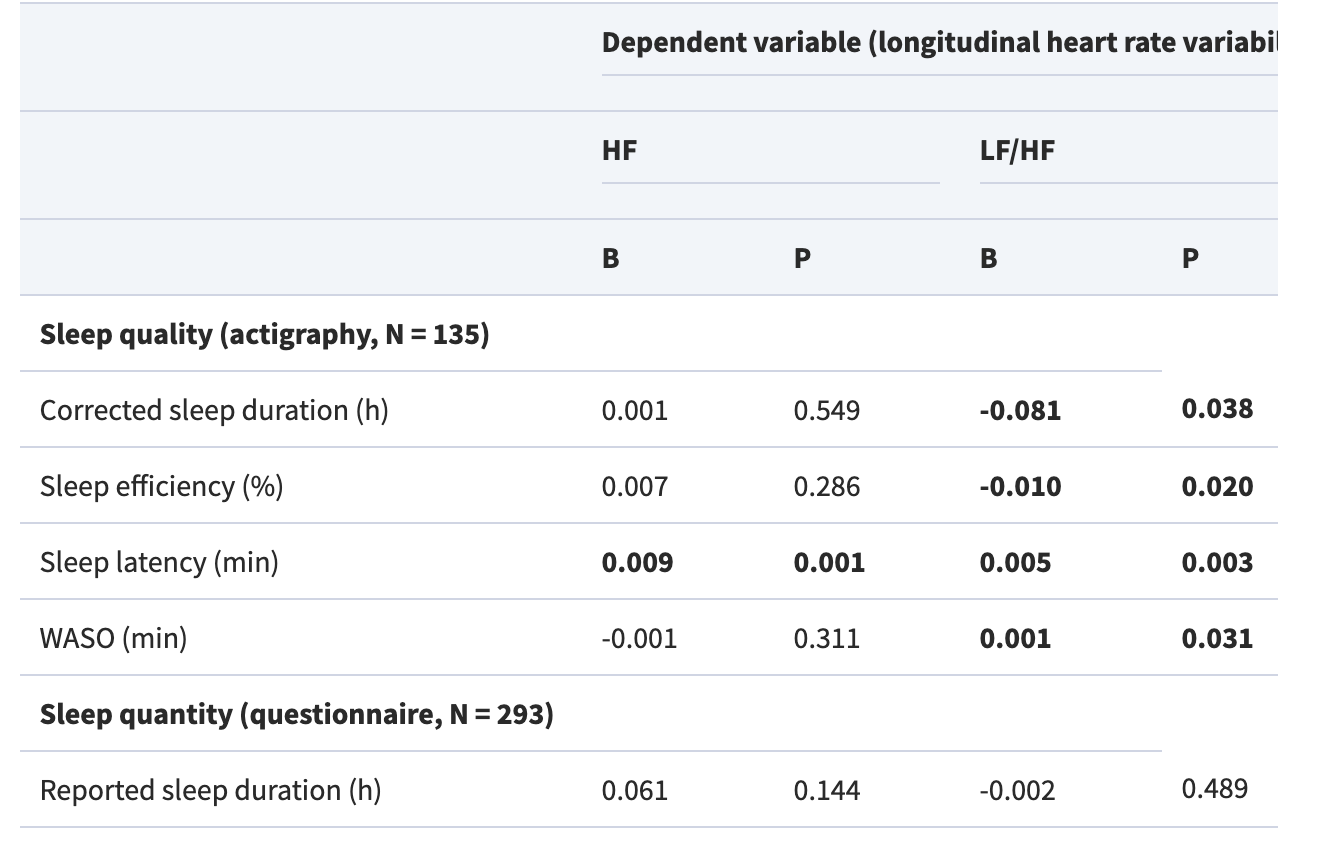

* As seen above, the P value is the paired t test value with significance when P < .05
* The HF and LF/HF is the higher or loweer/higher frequency spectral power when reading HRV.  Both are accurate but could give different results from the articles notes, however differentiating results is not important between the two types of readings.


To Define terms used in image:
* Sleep Efficiency: Balance between sleep stages (REM, Deep, Light)
* Sleep Latency: The length of time that it takes to accomplish the transition from full wakefulness to sleep, normally to the lightest of the non-REM sleep stages.
* WASO: Wake after sleep onset is the opposite of time it takes from sleep to full wakefulness.



As seen, the tests run from their model show that efficiency along with latency and waso are more significant than duration in terms of HRV prediction.

6. Visualization (from var_df, personal whoop data)
* I will use my Whoop data for alternative causality mechanisms

First visualization will be a heat map to show correlation between all 5 variables (code from Notebook)
* The purpose of this is to compare the results from the article with my own Whoop Data to confirm the level in which using my Data is appropriate

* The obvious limitation here is that the article is using Data from children 5-11 with N = 135 data points, due to privacy reasons, Children data is not found and I will use my whoop data from 475 days (N = 475).

In [ ]:

df_corr =  var_df[var_df.columns].corr()
df_corr

,HRV,Sleep Efficiency (%),Latency (min),Hours of Sleep,Sleep Consistency
HRV,1.000000,0.068916,-0.050951,0.205630,0.102322
Sleep Efficiency (%),0.068916,1.000000,-0.216035,0.318755,0.036200
Latency (min),-0.050951,-0.216035,1.000000,-0.062900,-0.052577
Hours of Sleep,0.205630,0.318755,-0.062900,1.000000,0.059505
Sleep Consistency,0.102322,0.036200,-0.052577,0.059505,1.000000


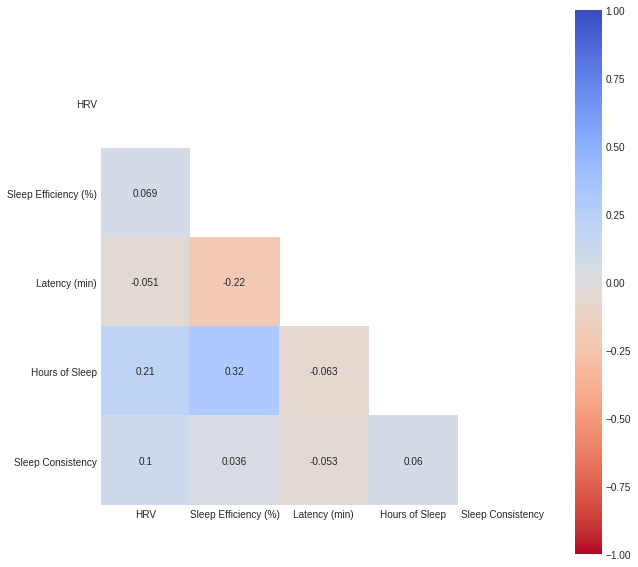

In [ ]:

df_mask = np.zeros_like(df_corr) #array of zeros of the same shape
df_mask[np.triu_indices_from(df_mask)] = True #turn upper triangle into ones

f,ax = plt.subplots(1,1,figsize=(10,10))

sb.heatmap(df_corr,vmin=-1,vmax=1,mask=df_mask,annot=True,square=True,ax=ax,cmap='coolwarm_r')

As seen above, there are variable relationships between all 5 metrics which was expected.  The strongest positive would be Sleep Efficiency and Hours of sleep, and the strongest negative would be Sleep Efficiency and Latency

Below will be a handful of scatter plots displaying the above relationships all to HRV as the y axis.

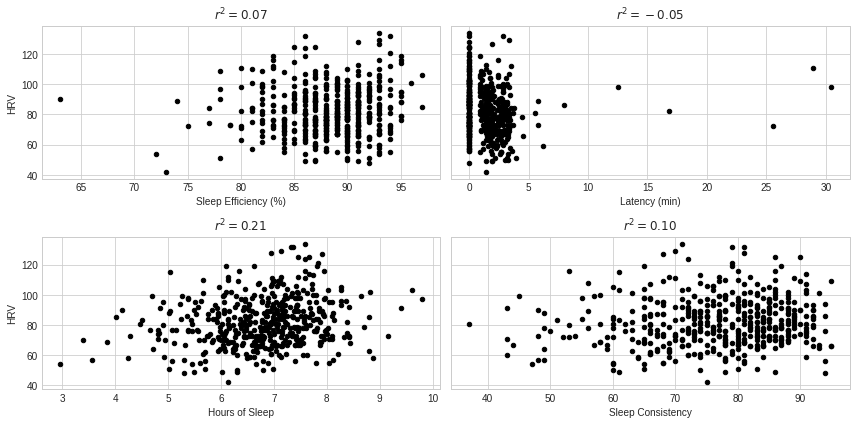

In [ ]:
f,axs = plt.subplots(2,2,figsize=(12,6),sharey=True)

cols = ['Sleep Efficiency (%)','Latency (min)','Hours of Sleep','Sleep Consistency']
        

for i,ax in enumerate(axs.flatten()):
    # Plot the data
    var_df.plot.scatter(x=cols[i],y='HRV',ax=ax,color='k')
    
    # Deal with missing data
    _df = var_df[[cols[i],'HRV']].dropna(how='any')
    
    # Compute the correlation coefficient
    corr_coef = np.corrcoef(_df[cols[i]],_df['HRV'])[0,1]
    
    # Make the correlation coefficient the axis title
    ax.set_title('$r^2 = {0:.2f}$'.format(corr_coef))
    
f.tight_layout()

As seen, the correlation coefficients are not showing strong relationships to HRV.  This might change when looking at significance in our model further down.
* The reason latency is all at the left end (or most of the data) is because Latency as a metric is the time it takes to go from full wakefullness to sleep, this usually does not take too long therefore a large portion of that data is within 7 minutes of time in bed before falling asleep.

8. Tests

* I will begin by creating a least squares model based off of the articles metrics + Sleep Consistency in hopes to show the relationship is consistent with the articles testing results.

In [ ]:
df_stats = var_df[['HRV','Sleep Efficiency (%)','Latency (min)','Hours of Sleep','Sleep Consistency']]

In [ ]:
# Make a new DataFrame with relevant columns
df_subdf = df_stats[cols + ['HRV']].copy()

# Put the date in the index
#df_subdf.set_index(df['Date'],inplace=True)

# Rename the columns
df_subdf.columns = ['HRV','SleepEfficiency','Latency','HoursSleep','SleepConsistency']

# Describe the values in each column
df_subdf.describe()

,HRV,SleepEfficiency,Latency,HoursSleep,SleepConsistency
count,475.000000,475.000000,475.000000,475.000000,475.000000
mean,88.246316,1.663453,6.783916,76.524211,82.170526
std,4.070627,2.635396,0.969355,10.890370,16.131526
min,63.000000,0.000000,2.950000,37.000000,42.000000
25%,86.000000,0.000000,6.220000,70.000000,71.000000
50%,89.000000,1.460000,6.900000,78.000000,81.000000
75%,91.000000,2.400000,7.430000,85.000000,92.000000
max,97.000000,30.470000,9.800000,95.000000,134.000000


In [ ]:

lm = smf.ols(formula = 'HRV ~ SleepEfficiency + Latency + HoursSleep + SleepConsistency',data=df_subdf).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HRV   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     19.17
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           1.28e-14
Time:                        16:13:57   Log-Likelihood:                -1304.4
No. Observations:                 475   AIC:                             2619.
Df Residuals:                     470   BIC:                             2640.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           79.8796      1.792     44.575      0.000      76.358      83.401
SleepEfficiency     -0.3036      0.066     -4.578      0.000      -0.434      -0.173
Latency              1.2890      0.184      7.008      0.000       0.928       1.650
HoursSleep           0.0030      0.016      0.188      0.851      -0.029       0.035
SleepConsistency    -0.0013      0.011     -0.115      0.909      -0.023       0.021
==============================================================================
Omnibus:                      113.269   Durbin-Watson:                   1.556
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              338.617
Skew:                          -1.116   Prob(JB):                     2.95e-74
Kurtosis:                       6.483   Cond. No.                     1.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model proves this dataset which is my Whoop data, provides us similar results.  As seen in the above sections from the image provided from the article, Sleep Quality (made up of Efficiency, Latency, and WASO) is more statistically significant than hours of sleep.

From this model, we see those results.  P >|t| shows that both Efficiency and Latency are significant, while Hours of Sleep are not.

We also see that Sleep Consistency is not statistically significant either.


My alternative causality will aim to prove:
* Mediation, where X causes A and A causes Y
* Confounding, where A causes both X AND Y

While the origial claim is not untrue (Better Sleep Quality means better HRV), the relationship could be incorrect because there are factors that could cause HRV to increase as well.

* The next step is to see if hours of sleep OR sleep consistency can play the role of the middle man of A which can help explain the result further.


Model Test A : Mediation
* Goal : Check if Hours of Sleep OR Sleep Consistency can be the X or A variable.  Based of Hills framework, this must be logical, therefore Sleep Efficiency wont cause more hours of sleep, but the other way around could be valid.

* Test : X causes A causes Y
* Hours of Sleep OR Sleep Consistency -> Sleep Efficiency/Latency (Quality) -> HRV

In [ ]:
lm2 = smf.ols(formula = 'SleepEfficiency ~ SleepConsistency + HoursSleep',data=df_subdf).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        SleepEfficiency   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.153
Date:                Wed, 21 Apr 2021   Prob (F-statistic):              0.316
Time:                        16:13:57   Log-Likelihood:                -1132.6
No. Observations:                 475   AIC:                             2271.
Df Residuals:                     472   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.1681      1.010      3.136      0.002       1.183       5.153
SleepConsistency    -0.0075      0.008     -0.998      0.319      -0.022       0.007
HoursSleep          -0.0116      0.011     -1.037      0.300      -0.034       0.010
==============================================================================
Omnibus:                      672.416   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           104880.382
Skew:                           7.424   Prob(JB):                         0.00
Kurtosis:                      74.265   Cond. No.                         946.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
lm3 = smf.ols(formula = 'Latency ~ SleepConsistency + HoursSleep',data=df_subdf).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Latency   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     10.80
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           2.58e-05
Time:                        16:13:57   Log-Likelihood:                -648.08
No. Observations:                 475   AIC:                             1302.
Df Residuals:                     472   BIC:                             1315.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.5234      0.364     15.162      0.000       4.808       6.239
SleepConsistency     0.0121      0.003      4.457      0.000       0.007       0.017
HoursSleep           0.0035      0.004      0.859      0.391      -0.004       0.011
==============================================================================
Omnibus:                       18.681   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.635
Skew:                          -0.374   Prob(JB):                     7.37e-06
Kurtosis:                       3.797   Cond. No.                         946.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model Test A : Mediation (Results)
* When running the models seen above, I tried to have Sleep Efficiency and Latency as the dependent variables with Hours of Sleep and Sleep Consistency as the metrics, in which for Efficiency, both were NOT statistically significant and for Latency, only Sleep Consistency was.

* In result, neither of the metrics would be appropriate to use for Mediation therefore Mediation does not work.

Model Test B: Confounding
* In this case, A causes X AND A causes Y

* This would be: Sleep Consistency/Hours of Sleep both are significant in predicting Sleep Efficiency and HRV.

* Since Mediation failed, and we tested Sleep Consistency/Hours of Sleep to Efficiency and Latency, confounding will also not be valid as a relationship.

As seen, my alternative relationships did not pass the statistically significance test.

The only relationship that appeared to be valid upon testing was:
* Reverse Causation where increase in HRV can be linked to increase in Sleep Efficiency and Latency.  
* The logic behind this is invalid, since HRV is a response to the bodies autonomic nervous system and Sleep Efficiency and Quality in general can IMRPOVE HRV but the reverse logic is not valid in scientific terms based off many literature pieces.

# Write Up
This assignment was based on the ability to find an article,news story, etc., with a claim of some sorts.  This claim could be valid or invalid, but the objective was to challenge this claim with an alternate causal relationship that could prove the data to be correct or incorrect depending on position.
 
For this assignment, the article I found follows previous Modules topics, and that is Heart Rate Variability in Children 5-11, and how Sleep impacts there HRV levels and development.
 
The reason I chose this article was because Sleep and an individuals bodies readiness and recovery have been of great interest of mine.  This topic aligns with Whoop's(fitness wearable company) beliefs when it comes to increasing HRV and in result, Recovery(topic for another Module).  The claim made in this article is valid, as I will explain, but the causal relationship could be investigated.
 
In [*Children's Sleep and Autonomic Function: Low Sleep Quality Has an Impact on Heart Rate Variability*](https://academic.oup.com/sleep/article/36/12/1939/2709419), Michels et al. tackle a few metrics regarding Sleep.
* Sleep Quality and Sleep Duration
* Sleep Quality is made up of Sleep Efficiency (balance of percentage of time spend in the stages of Sleep), Latency (time from full wakefulness to sleep) and WASO (wake after sleep onset, which is time from sleep to full wakefulness).
 
In the article, the authors conduct several tests comparing the results from different spectral power monitors for HRV recording, paired with those Sleep Quality metrics + Hours of sleep (Sleep Duration).  The results that were found helped the authors support their claim of (in summary) that sleep quality is more important that sleep duration for HRV, and that increasing Sleep Quality will have a positive correlation/statistically significant when predicting HRV.  In short, "better" sleep means higher HRV and in result, healthier children and efficient development.
 
This claim is a simple causal relationship based off lecture slides, and it is logical as well based off experimentation and pure science (see Hills framework as well).  The claim is true from statistical values and valid based off logic.  My goal is to tackle what could cause Sleep Efficiency and Quality to increase, meaning that would have an extending impact on HRV as well.
 
The limitation of this article and this module was based on the accessibility of the article's data.  The article did not provide data and searching online for related data sets proved to be unsuccessful.  The individuals in this study are children aged 5-11, which means parents have the right to keep their children's data private and out of reach from the public.  Due to this, I used my Whoop data (similar to other Modules) on my own sleep and HRV statistics.  The limitation is that the article used the data from Children where the results could be different from an Adult male such as myself.  The data in the article was N = 135 where my own data (while it is of one person) is N = 475 days of data which help my experimentation.
 
The data frame I created was of the metrics the article used along with my own metric to use in the alternative causal relationship test.  The data frame I created consisted of:
 
* HRV
* Sleep Efficiency
* Latency
* Hours of Sleep
* Sleep Consistency(this metric means over the previous nights, how far was I from my "usual" bedtime or wake time)
 
After checking the data for any missing values and the shape to be consistent with the expectation (see EDA for specific values and thought process), I proceeded to work towards testing my data based off a Ordinary Least Square Regression model to confirm if my Whoop data was appropriate to use based off the models values found with HRV as the dependent variable.
 
My first steps after checking the data set and frames structure was to create a few Visualizations.  Specifically, a heat map and scatter plot(s).  This was seen in lecture and inspired me to do the same. The heat map show correlation coefficients and the strength level for color hue.  This was helpful because I was able to display the various relationships between all 5 metrics.
 
The second visualization was 4 individual scatter plots, all with HRV as the dependent variable and the other variable changing from Sleep Efficiency to Sleep Consistency.  The goal of this chart was to also display that the pure correlation between individual metrics could be weak but as a whole, could lead to a stronger model prediction.
 
After the visualizations, I created an OLS model(based off of a python package and lecture's Notebook "Multiple Regression").  This model included HRV as the dependent variable.  I first checked the articles equation, and my model with my Whoop data followed correctly and while the statistical values were different from the Image in the EDA (the image was of the articles table), the metrics that were significant or not (based off of paired t test) were accurate.
 
My next step was to find an alternate causal relationship.  The two mentioned in the EDA where Mediation (X causes A and A causes Y) and Confounding (A causes X and A causes Y).
I was able to single out and change the dependent variable in the model to confirm or deny these alternate causal relationships.  The reason I chose those two were because Sleep Efficiency and Quality can be linked to other variables and including another metric could strengthen the article's claim.
 
As seen in the EDA:
* Model Test A consisted of the dependent variable being both Efficiency and Latency separately, with Sleep Consistency and Hours of sleep being the metrics.  This model disproved Mediation because (following logical steps where Efficiency can be caused by Sleep Consistency or Hours of sleep, not the other way around) Sleep Consistency or Hours of Sleep did not prove to be statistically significant when finding Sleep Efficiency or Latency consistently.
* Due to the failed test above, confounding followed that A in this case is Sleep Consistency or Hours of Sleep, and neither proved to be significant in predicting Sleep Efficiency.  This failed the confounding relationship
 
While I only tested two causal relationships in the EDA, I further investigated with flipping variables around and none were found to be valid. 
 
The only alternate causal relationship is the Reverse Causal , flipping the original claim.  This would mean that HRV or increase in HRV can lead to more quality sleep or better Sleep Quality.  This proved to be true statistically with Sleep Efficiency and Latency as the Dependent Variables with HRV as the sole metric, however this is not valid.  HRV is the body's autonomic nervous system response, and this metric and value can change based on several indicators, one being Sleep.  However based on Hills framework, the logic here is invalid and fails the alternate causal relationship which was the reverse causal.
 
In summary, my alternate causal relationship experiments failed.  This could mean that the original claim and causal relationship given by the authors was not only correct statistically, but also the most valid relationship as well.
 

